# [TSUBAME3特有] Jupyter Lab 機能で CuPy を使うには
TSUBAME3のJuputer Lab機能で提供されるPythonにはデフォルトではCuPyが含まれていません。  
CuPyの利用には、CUDA関係の環境変数の設定など、いくつか前準備が必要になるため、ここでは順を追って例を示します。

## CUDA等が利用できるJupyter Kernelを用意する
TSUBAME3のJupyter Lab機能には、任意のモジュールがロードされた状態のPython環境(Kernel)を設定する機能が提供されています。  
CUDA, CuDNN, NCCLが利用できるカーネルを作成するには、以下のコードを実行してください。

In [1]:
from t3jpttools import create_kernel
create_kernel('python3-cuda','cuda/10.2.89 cudnn/7.6 nccl/2.4.2')

finished : The kernel is ready.


登録されているカーネルの一覧は以下のコードで得られます

In [2]:
from t3jpttools import list_kernel, delete_kernel, create_kernel
list_kernel()

Available kernels:
------------------------------
python3-cuda
python3
------------------------------
finished : Listed kernels.


登録したカーネルは以下のコマンドで削除できます。

In [3]:
from t3jpttools import delete_kernel
delete_kernel('python3-cuda')

finished : The kernel is deleted.


create_kernel()を実行後、数十秒待つと、右上のカーネル選択メニューに作成したカーネルが出現します。

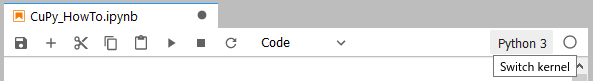

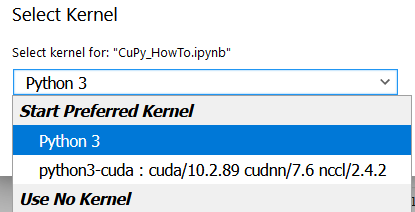

ここから先は、作成したカーネルを選択してから実行してください。

## CuPy のインストール
CuPyのインストールは`pip`コマンドを実行することで行えます。  
時間短縮のためにも`cupy`パッケージではなく、`cupy-cuda102` など、CUDAバージョンを明示的に指定したパッケージをインストールしてください。

In [1]:
%%bash
python3 -m pip install --user cupy-cuda102 matplotlib

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


CuPyのインストールが終わったら、先ほどと同様の手順で同じカーネルを選択し直すか、0を2回タイプして、Pythonをリロードしてください。

## CuPyの利用
あとは、通常の CuPy がインストールされた環境と同様、cupy モジュールが利用できるようになります。  
CUDAが利用できるカーネルが選択されていれば、次回以降はカーネルやCuPyのインストールを行う必要はありません。

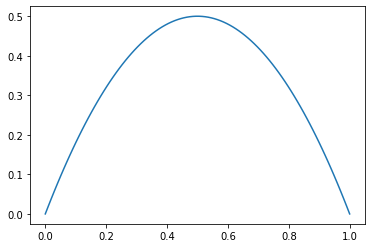

In [1]:
import cupy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100);
plt.figure(0)
plt.plot(np.asnumpy(x), np.asnumpy(2*x*(1-x)))
plt.show()

CuPy で書かれたプログラムの実行時に、GPUが利用されているかを確認するには、Terminalを立ち上げて `nvidia-smi` コマンドを実行してください。

## ジョブを終了するには
Jupyter Lab機能で起動したジョブを終了するには、FileメニューからShut Downを選択してください。